In [1]:
import numpy as np
from classfunctions import NbodyClass
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

# Part 3: Large n

This script scatters many particles randomly through a domain and watches as time passes. Both the periodic and nonperiodic case are considered.

Contents:
- Periodic case results
- Nonperiodic case results
- Code for running simulation

### Periodic case results

In the periodic case we should see the mass clump slightly into smaller regions, but not be drawn completely together, since it's recieving equal draw from all directions.

In the GIF below, we see the correct initial formation of the small clumps, before the model eventually breaks down and gets pulled into one solid clump, which wraps around partially through the yz plane. This model was run in a grid size 50x50x50, with 10^5 particles, with a softening of 1, and with the np.gradient method of taking derivatives.

<img src="part3PeriodicOutputs/grid50step99soften1/grid50step99soften1output.gif" width="800" height="800"/>


##### Energy
The energy for this case seemed to be fairly conserved until the model started breaking down and collapsing into a single solid clump. As the model started to settle, the energy started to drop again, but did not return to its previous level before the simulation ened. Plotted below are the three components of the kinetic energy, and a graph of the potential and total energy. This energy is the total energy for all of the particles in the system.

<img src="part3PeriodicOutputs/grid50step99soften1/kineticenergy.png" width="300" height="800"/>
<img src="part3PeriodicOutputs/grid50step99soften1/potentialenergy.png" width="300" height="800"/>

### Non - periodic case results

In the non-periodic case we should see all of the particles run to the center of the grid, as they will be drawn towards eachother. Because the particles are drawn in so quickly, we should see a large wave the particles overshoot the clump of particles and disappear off the grid, with the majority remaining trapped and staying in the center of the grid. The steady state involves a majority clump in the center with some particles flying around it, pulled in and past by the great gravity of the main clump.

That is what we see in the following GIF. The model was run with the same parameters as the periodic case (50x50x50 grid, 10^5 particles, softening of one, and using np.gradient method). Note additionally the interesting shape as it collapses and the first wave of particles overshoots and disappears. This is likely due to the initial square shape of the particle grid and the higher particle density in a line towards the corners, or the different shape of the greens potential caused by softening.

<img src="part3NonperiodicOutputs/grid50step99soften1/grid50step99soften1output.gif" width="800" height="800"/>

##### Energy
Again, we see that during the intense collapse of the particles into a clump, we find that the model does not conserve energy. It 'gains' a large amount of energy during the collapse, mostly due to the potential dramatically increasing from the close proximity of so many particles, and then subsequently 'loses' a large amount of the energy, from both the model settling down and likely also from particles exiting and being expelled from the grid.

However after the initial collapse it manages to once again begin conserving energy, and the total energy flattens out. 

<img src="part3NonperiodicOutputs/grid50step99soften1/kineticenergy.png" width="300" height="800"/>
<img src="part3NonperiodicOutputs/grid50step99soften1/potentialenergy.png" width="300" height="800"/>


### Code for running.
Below is the code that I used to:
- run the nbody simulation
- save the run information
- plot and save the energy information

Below is shown a couple runs that I duplicated for convenience when running overnight.

In [2]:
num_part = 10**5
spread=50
periodic = True
vzero = True
soft=4
n = 99
gradient = True


name_prefix = "grid" + str(spread) + "step" + str(n) + "soften" + str(soft)
if periodic:
    outdir = "part3PeriodicOutputs/" + name_prefix + "/" + name_prefix
else:
    outdir = "part3NonperiodicOutputs/" + name_prefix + "/" + name_prefix

print(outdir)
    
pos = spread*np.random.rand(3, num_part)
# pos = (spread/2)*np.random.randn(3, num_part) + spread/2 #gaussian distribution
if vzero:
    v = np.zeros( (3, num_part) )
else:
    v = np.random.rand(3, num_part)
    
#instantiate the class
nbody = NbodyClass(pos, v, outdir=outdir, sgrid=spread, periodic=periodic, gradient=gradient, soft=soft)
nbody.calculate_potential(DEBUG=False)

nbody.take_n_steps(n, plots=True, plot_every=1)

part3PeriodicOutputs/grid50step99soften4/grid50step99soften4


99

In [3]:
print('Run specs: ')
print('Periodic: ', periodic)
print('Grid cells: ', spread)
print('Number of particles: ', num_part)
print('Number of steps: ', n)
print('Velocities start at zero :', vzero)
print('Softening: ', soft)

readme = outdir+ "readme.txt"
print('printing to readme file ...', readme)
f = open(readme, "w")
f.write('Run specs:')
f.write('\nPeriodic: ' + str(periodic))
f.write('\nGrid cells: ' + str(spread))
f.write('\nNumber of particles: ' + str(num_part))
f.write('\nNumber of steps: ' + str(n))
f.write('\nVelocities start at zero :' +  str(vzero))
f.write('\nSoftening: ' + str(soft))
f.write('\nGradient: ' + str(gradient))
f.close()

Run specs: 
Periodic:  True
Grid cells:  50
Number of particles:  100000
Number of steps:  99
Velocities start at zero : True
Softening:  4
printing to readme file ... part3PeriodicOutputs/grid50step99soften4/grid50step99soften4readme.txt


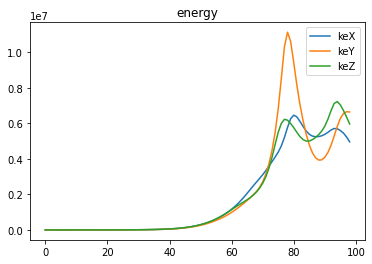

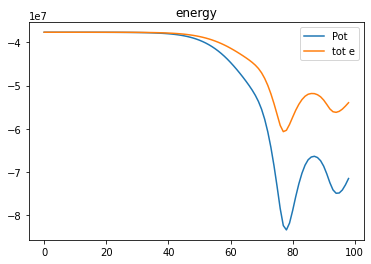

In [4]:
#plot the energy, see how well it's conserved
# nbody.plot_energy()
lims = 25

mpl.figure()
# mpl.plot(range(0, n), nbody.pe[:n])
mpl.plot(range(0, n), nbody.ke[0, :n])
mpl.plot(range(0, n), nbody.ke[1, :n])
mpl.plot(range(0, n), nbody.ke[2, :n])
# mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['keX', 'keY', 'keZ'])
mpl.title('energy')
# mpl.xlim([0, lims])
mpl.show()

mpl.figure()
mpl.plot(range(0, n), nbody.pe[:n])
# mpl.plot(range(0, n), nbody.ke[0, :n])
# mpl.plot(range(0, n), nbody.ke[1, :n])
# mpl.plot(range(0, n), nbody.ke[2, :n])
mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['Pot', 'tot e'])
# mpl.legend(['Pot', 'keX', 'keY', 'keZ', 'tot e'])
# mpl.xlim([0, lims])
mpl.title('energy')
mpl.show()

np.save(outdir + 'kinen', nbody.ke)
np.save(outdir + 'poten', nbody.pe)

part3NonperiodicOutputs/grid50step99soften4/grid50step99soften4
Run specs: 
Periodic:  False
Grid cells:  50
Number of particles:  100000
Number of steps:  99
Velocities start at zero : True
Softening:  4
printing to readme file ... part3NonperiodicOutputs/grid50step99soften4/grid50step99soften4readme.txt


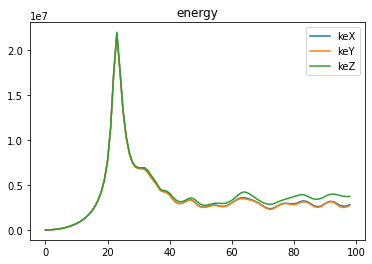

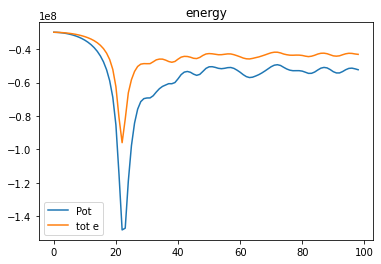

In [5]:
num_part = 10**5
spread=50
periodic = False
vzero = True
soft=4
n = 99
gradient = True


name_prefix = "grid" + str(spread) + "step" + str(n) + "soften" + str(soft)
if periodic:
    outdir = "part3PeriodicOutputs/" + name_prefix + "/" + name_prefix
else:
    outdir = "part3NonperiodicOutputs/" + name_prefix + "/" + name_prefix

print(outdir)
pos = spread*np.random.rand(3, num_part)
# pos = (spread/2)*np.random.randn(3, num_part) + spread/2 #gaussian distribution
if vzero:
    v = np.zeros( (3, num_part) )
else:
    v = np.random.rand(3, num_part)
    
#instantiate the class
nbody = NbodyClass(pos, v, outdir=outdir, sgrid=spread, periodic=periodic, gradient=gradient, soft=soft)
nbody.calculate_potential(DEBUG=False)

nbody.take_n_steps(n, plots=True, plot_every=1)

print('Run specs: ')
print('Periodic: ', periodic)
print('Grid cells: ', spread)
print('Number of particles: ', num_part)
print('Number of steps: ', n)
print('Velocities start at zero :', vzero)
print('Softening: ', soft)

readme = outdir+ "readme.txt"
print('printing to readme file ...', readme)
f = open(readme, "w")
f.write('Run specs:')
f.write('\nPeriodic: ' + str(periodic))
f.write('\nGrid cells: ' + str(spread))
f.write('\nNumber of particles: ' + str(num_part))
f.write('\nNumber of steps: ' + str(n))
f.write('\nVelocities start at zero :' +  str(vzero))
f.write('\nSoftening: ' + str(soft))
f.write('\nGradient: ' + str(gradient))
f.close()

#plot the energy, see how well it's conserved
# nbody.plot_energy()
lims = 25

mpl.figure()
# mpl.plot(range(0, n), nbody.pe[:n])
mpl.plot(range(0, n), nbody.ke[0, :n])
mpl.plot(range(0, n), nbody.ke[1, :n])
mpl.plot(range(0, n), nbody.ke[2, :n])
# mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['keX', 'keY', 'keZ'])
mpl.title('energy')
# mpl.xlim([0, lims])
mpl.show()

mpl.figure()
mpl.plot(range(0, n), nbody.pe[:n])
# mpl.plot(range(0, n), nbody.ke[0, :n])
# mpl.plot(range(0, n), nbody.ke[1, :n])
# mpl.plot(range(0, n), nbody.ke[2, :n])
mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['Pot', 'tot e'])
# mpl.legend(['Pot', 'keX', 'keY', 'keZ', 'tot e'])
# mpl.xlim([0, lims])
mpl.title('energy')
mpl.show()

np.save(outdir + 'kinen', nbody.ke)
np.save(outdir + 'poten', nbody.pe)

part3PeriodicOutputs/grid50step99soften1/grid50step99soften1
Run specs: 
Periodic:  True
Grid cells:  50
Number of particles:  100000
Number of steps:  99
Velocities start at zero : True
Softening:  1
printing to readme file ... part3PeriodicOutputs/grid50step99soften1/grid50step99soften1readme.txt


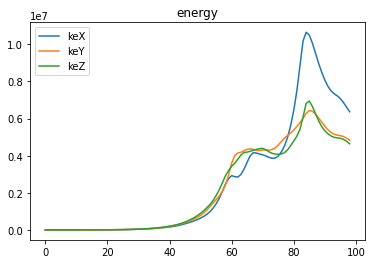

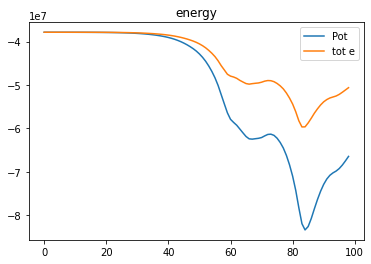

In [6]:
num_part = 10**5
spread=50
periodic = True
vzero = True
soft=1
n = 99
gradient = True


name_prefix = "grid" + str(spread) + "step" + str(n) + "soften" + str(soft)
if periodic:
    outdir = "part3PeriodicOutputs/" + name_prefix + "/" + name_prefix
else:
    outdir = "part3NonperiodicOutputs/" + name_prefix + "/" + name_prefix

print(outdir)
pos = spread*np.random.rand(3, num_part)
# pos = (spread/2)*np.random.randn(3, num_part) + spread/2 #gaussian distribution
if vzero:
    v = np.zeros( (3, num_part) )
else:
    v = np.random.rand(3, num_part)
    
#instantiate the class
nbody = NbodyClass(pos, v, outdir=outdir, sgrid=spread, periodic=periodic, gradient=gradient, soft=soft)
nbody.calculate_potential(DEBUG=False)

nbody.take_n_steps(n, plots=True, plot_every=1)

print('Run specs: ')
print('Periodic: ', periodic)
print('Grid cells: ', spread)
print('Number of particles: ', num_part)
print('Number of steps: ', n)
print('Velocities start at zero :', vzero)
print('Softening: ', soft)

readme = outdir+ "readme.txt"
print('printing to readme file ...', readme)
f = open(readme, "w")
f.write('Run specs:')
f.write('\nPeriodic: ' + str(periodic))
f.write('\nGrid cells: ' + str(spread))
f.write('\nNumber of particles: ' + str(num_part))
f.write('\nNumber of steps: ' + str(n))
f.write('\nVelocities start at zero :' +  str(vzero))
f.write('\nSoftening: ' + str(soft))
f.write('\nGradient: ' + str(gradient))
f.close()

#plot the energy, see how well it's conserved
# nbody.plot_energy()
lims = 25

mpl.figure()
# mpl.plot(range(0, n), nbody.pe[:n])
mpl.plot(range(0, n), nbody.ke[0, :n])
mpl.plot(range(0, n), nbody.ke[1, :n])
mpl.plot(range(0, n), nbody.ke[2, :n])
# mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['keX', 'keY', 'keZ'])
mpl.title('energy')
# mpl.xlim([0, lims])
mpl.show()

mpl.figure()
mpl.plot(range(0, n), nbody.pe[:n])
# mpl.plot(range(0, n), nbody.ke[0, :n])
# mpl.plot(range(0, n), nbody.ke[1, :n])
# mpl.plot(range(0, n), nbody.ke[2, :n])
mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['Pot', 'tot e'])
# mpl.legend(['Pot', 'keX', 'keY', 'keZ', 'tot e'])
# mpl.xlim([0, lims])
mpl.title('energy')
mpl.show()

np.save(outdir + 'kinen', nbody.ke)
np.save(outdir + 'poten', nbody.pe)

part3NonperiodicOutputs/grid50step99soften1/grid50step99soften1
Run specs: 
Periodic:  False
Grid cells:  50
Number of particles:  100000
Number of steps:  99
Velocities start at zero : True
Softening:  1
printing to readme file ... part3NonperiodicOutputs/grid50step99soften1/grid50step99soften1readme.txt


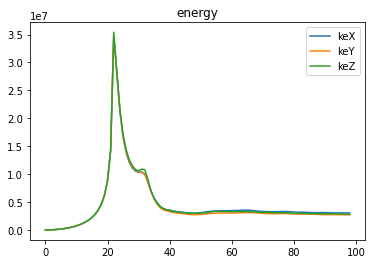

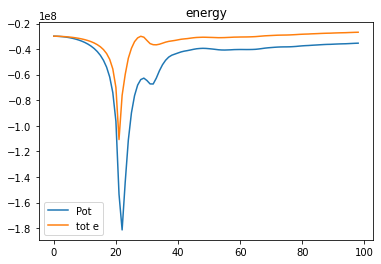

In [8]:
num_part = 10**5
spread=50
periodic = False
vzero = True
soft=1
n = 99
gradient = True


name_prefix = "grid" + str(spread) + "step" + str(n) + "soften" + str(soft)
if periodic:
    outdir = "part3PeriodicOutputs/" + name_prefix + "/" + name_prefix
else:
    outdir = "part3NonperiodicOutputs/" + name_prefix + "/" + name_prefix

print(outdir)
pos = spread*np.random.rand(3, num_part)
# pos = (spread/2)*np.random.randn(3, num_part) + spread/2 #gaussian distribution
if vzero:
    v = np.zeros( (3, num_part) )
else:
    v = np.random.rand(3, num_part)
    
#instantiate the class
nbody = NbodyClass(pos, v, outdir=outdir, sgrid=spread, periodic=periodic, gradient=gradient, soft=soft)
nbody.calculate_potential(DEBUG=False)

nbody.take_n_steps(n, plots=True, plot_every=1)

print('Run specs: ')
print('Periodic: ', periodic)
print('Grid cells: ', spread)
print('Number of particles: ', num_part)
print('Number of steps: ', n)
print('Velocities start at zero :', vzero)
print('Softening: ', soft)

readme = outdir+ "readme.txt"
print('printing to readme file ...', readme)
f = open(readme, "w")
f.write('Run specs:')
f.write('\nPeriodic: ' + str(periodic))
f.write('\nGrid cells: ' + str(spread))
f.write('\nNumber of particles: ' + str(num_part))
f.write('\nNumber of steps: ' + str(n))
f.write('\nVelocities start at zero :' +  str(vzero))
f.write('\nSoftening: ' + str(soft))
f.write('\nGradient: ' + str(gradient))
f.close()

#plot the energy, see how well it's conserved
# nbody.plot_energy()
lims = 25

mpl.figure()
# mpl.plot(range(0, n), nbody.pe[:n])
mpl.plot(range(0, n), nbody.ke[0, :n])
mpl.plot(range(0, n), nbody.ke[1, :n])
mpl.plot(range(0, n), nbody.ke[2, :n])
# mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['keX', 'keY', 'keZ'])
mpl.title('energy')
# mpl.xlim([0, lims])
mpl.show()

mpl.figure()
mpl.plot(range(0, n), nbody.pe[:n])
# mpl.plot(range(0, n), nbody.ke[0, :n])
# mpl.plot(range(0, n), nbody.ke[1, :n])
# mpl.plot(range(0, n), nbody.ke[2, :n])
mpl.plot(range(0, n), nbody.pe[:n] + np.sum(nbody.ke, axis=0)[:n])
mpl.legend(['Pot', 'tot e'])
# mpl.legend(['Pot', 'keX', 'keY', 'keZ', 'tot e'])
# mpl.xlim([0, lims])
mpl.title('energy')
mpl.show()

np.save(outdir + 'kinen', nbody.ke)
np.save(outdir + 'poten', nbody.pe)

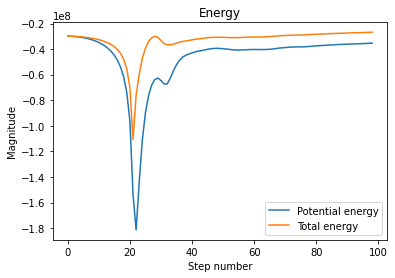

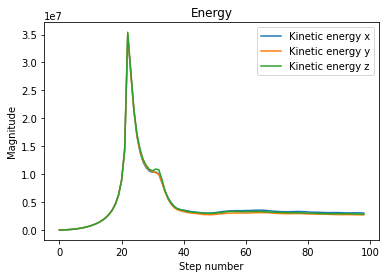

In [10]:
#read in and make nice graphs of energy

f1 = "part3NonperiodicOutputs/grid50step99soften1/grid50step99soften1poten.npy"
f2 = "part3NonperiodicOutputs/grid50step99soften1/grid50step99soften1kinen.npy"
# f1 = "part4Outputs/grid50step99soften1/grid50step99soften1poten.npy"
# f2 = "part4Outputs/grid50step99soften1/grid50step99soften1kinen.npy"
pe = np.load(f1)
ke = np.load(f2)

numsteps = 99

mpl.figure()
mpl.plot(range(numsteps), pe[:numsteps])
mpl.plot(range(numsteps), pe[:numsteps] + np.sum(ke[:, :numsteps], axis=0))
mpl.legend(['Potential energy', 'Total energy'])
mpl.title('Energy')
mpl.xlabel('Step number')
mpl.ylabel('Magnitude')
mpl.show()

mpl.figure()
mpl.plot(range(numsteps), ke[0, :numsteps])
mpl.plot(range(numsteps), ke[1, :numsteps])
mpl.plot(range(numsteps), ke[2, :numsteps])
mpl.legend(['Kinetic energy x', 'Kinetic energy y', 'Kinetic energy z'])
mpl.title('Energy')
mpl.xlabel('Step number')
mpl.ylabel('Magnitude')
mpl.show()